#### Machine Learning Classifiers      
#### Brayan Olivares

#### Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar datos
df = pd.read_csv("titanic.csv")  
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


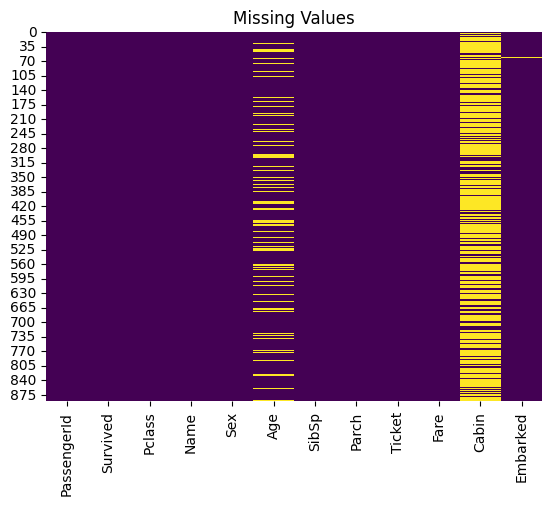

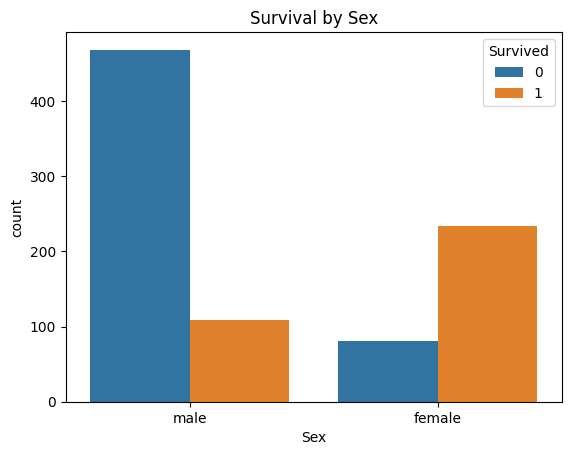

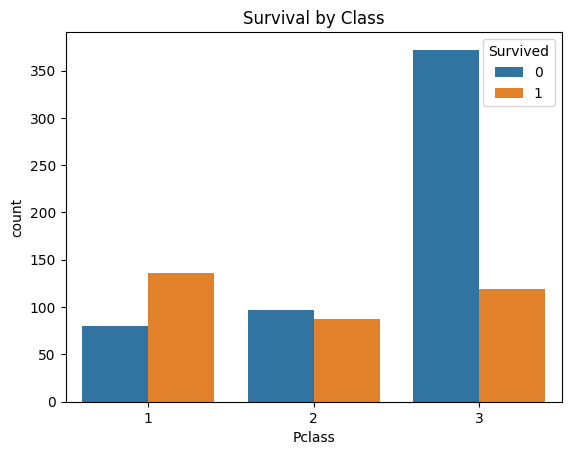

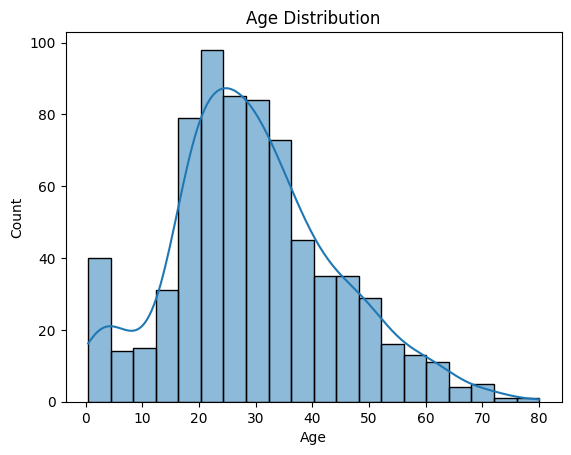

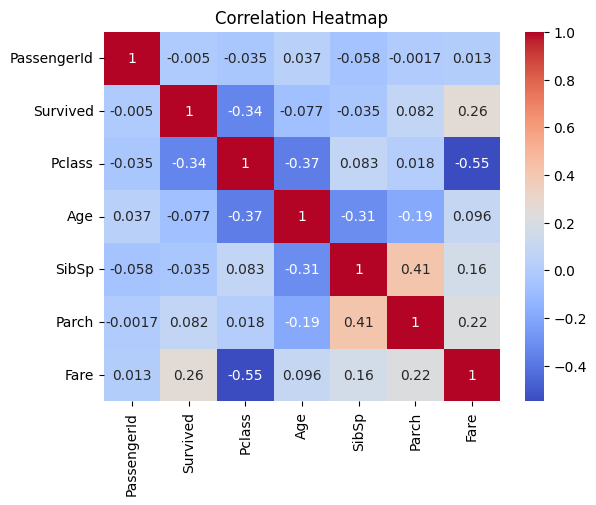

In [2]:
# Información general
df.info()

# Valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values")
plt.show()

# Distribución por género
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

# Distribución por clase
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

# Edad
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

# Correlación
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#### 2. Feature Engineering & Data Transformation

In [3]:
# Imputar valores faltantes
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Convertir variables categóricas
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male:1, female:0
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Crear nuevas variables
df['FamilySize'] = df['SibSp'] + df['Parch']

# Selección de características
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### 3. Model Implementation

#### Logistic

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



 Decision Tree 

In [5]:
params_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 10, 20]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), params_dt, cv=5)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.predict(X_test)

print("Decision Tree:\n", classification_report(y_test, y_pred_dt))


Decision Tree:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Random Forest

In [6]:
params_rf = {'n_estimators': [50, 100], 'max_depth': [5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=0), params_rf, cv=5)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#### 4. Model Benchmarking & Selection   

                 Model  Accuracy
0  Logistic Regression  0.804469
1        Decision Tree  0.798883
2        Random Forest  0.804469


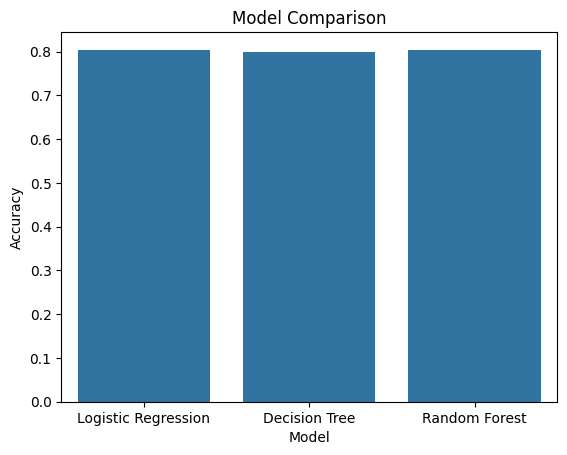

In [7]:
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_logreg),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

benchmark = pd.DataFrame(models.items(), columns=["Model", "Accuracy"])
print(benchmark)
sns.barplot(data=benchmark, x="Model", y="Accuracy")
plt.title("Model Comparison")
plt.show()


In [ ]:
#### Best Model = Random Forest  0.804469